In [1]:
import sys

sys.path.append('../../../common_code')
from PostProcessingScripts import * 
from formation_channels import * 
import astropy.stats
import pandas as pd

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

##########
# define colors for formation channels 
channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'orange',  'immediate CE': '#EF476F'  , r'double-core CE':'#073B4C', 'other':'gray', 'vi':'cyan', 'vii':'#FFD166'}
List_formationchannelOptions = ['All',  'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'vi', 'vii', 'other']
ind_formationchannelOptions = [7,  1, 2, 3, 4, 5, 6, 0]
dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}

channelColorDict_lighter = {'classic':adjust_lightness(color='#118AB2', amount=1.6),'stable B no CEE':adjust_lightness(color='orange', amount=1.4), 'immediate CE':adjust_lightness(color='#EF476F', amount=1.2),\
                            r'double-core CE':adjust_lightness(color='#073B4C', amount=1.8), 'other':adjust_lightness(color='gray', amount=1.5),  'vi':adjust_lightness(color='cyan', amount=1.5), 'vii':adjust_lightness(color='#FFD166', amount=1.2)}
channelList = ['classic', 'stable B no CEE', 'vii',  'immediate CE',  r'double-core CE', 'other'] #, 'vi']
#######


In [2]:
def obtain_redshiftsruns(pathData = '/Volumes/SimonsFoundation/DataDCO/'):
    BPSmodelName='A'
    DCOtype='BNS'
    path_ = '/Volumes/SimonsFoundation/DataDCO/' + alphabetDirDict[BPSmodelName] +'/'
    path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
    fdata = h5.File(path, 'r')
    redshifts = fdata['redshifts']['redshift'][...].squeeze()
    fdata.close()
    return redshifts 



def obtain_path(DCOtype, BPSmodelName, weights_type):
    # you have to change the following line to your local path 
    pd_file_path_base = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_paper-Fig_X_total-redshift-rates/'
    
    pd_file_name =   DCOtype + '_' + BPSmodelName  + '_w_' + weights_type + '.csv'
    pd_file_path = pd_file_path_base + pd_file_name
    
    return pd_file_path





In [18]:
def plot_redshift_rate_single_panel(axe='None', whichplot='rate', DCOtype='BHNS', \
                                          BPSmodelName='A', weights_type='merger', redshifts=[0], pathData='/Volumes/SimonsFoundation/DataDCO/',\
                                    singlemssfr=False, plot_fraction=False, plot_model_legend=True, plot_formation_channels=True,\
                                   minimum_contribution_fc_threshold=False, highlight_on=True, provide_adjustedChannelList=False, highlight_specif_models=False):
    """
    whichplot='rate', 'ratio'
    
    """

    if provide_adjustedChannelList==False: adjustedChannelList = [ 'immediate CE',  r'double-core CE', 'other', 'classic', 'stable B no CEE'] # 'vii', 
    else: adjustedChannelList = provide_adjustedChannelList
    
    DCOname = DCOname_dict[DCOtype]
    pd_file_path = obtain_path(DCOtype, BPSmodelName, weights_type)
    df = pd.read_csv(pd_file_path)
    
    if singlemssfr==False: MSSFRs = MSSFRnameslist
    else: 
        MSSFRs = [singlemssfr] 
        print('check if this actually works with the next line')
    

    
    for ind_mssfr, mssfr in enumerate(MSSFRs[1:]): 
        
        key_total_mssfr = 'total_rate_' + 'xyz_' + mssfr
        totals_z =  df[key_total_mssfr]

        # assign line/marker properties. if we want to highlight the model, assign different marker properties
        highlight_specific_model = False
        alpha_m, z_order, lw_m = 0.2, 9, 2
        if (BPSmodelName in highlight_specif_models) & (mssfr in ['111', '313']): 
            highlight_specific_model = True
            alpha_m, z_order, lw_m = 0.6, 10, 2.7

            
        # plot the formation channel fractions 
        for nrC, Channel in enumerate(adjustedChannelList): 

            if highlight_specific_model==True: c_FC = channelColorDict[Channel]
            else: c_FC = channelColorDict_lighter[Channel]

            fparam_key_fc, key_fc_mssfr, fractions_z, header_fc = "formationchannel_z_rates", Channel + 'xyz_' + mssfr, np.zeros_like(redshifts),  "fraction_" + Channel + "_" + mssfr 
            fc_rates_z =  df[key_fc_mssfr]   

            if plot_fraction==True: fc_z =  fc_rates_z / totals_z  # plot fraction instead of totals 
            else: fc_z = fc_rates_z    # plot totals 
            
            # mask minimum contributions below threshold
            if minimum_contribution_fc_threshold!=False:
                mask_does_not_pass_fc_threshold = ((fc_rates_z / totals_z)< minimum_contribution_fc_threshold) 
                fc_z[mask_does_not_pass_fc_threshold] = np.nan      


            axe.plot(redshifts, fc_z, color=c_FC, lw=lw_m, zorder=z_order, alpha=alpha_m)

            if highlight_specific_model==True:                    
                marker_shape_bps = dictMarkerShape[BPSmodelName]
                axe.scatter(redshifts, fc_z, color='k', zorder=z_order+2, marker=marker_shape_bps, s=40) #, label=bps_model_to_highlight)  
                axe.plot(redshifts, fc_z, color=c_FC, lw=lw_m, zorder=z_order+1, alpha=alpha_m)



#     if plot_model_legend==True:
#         bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
#         axe.annotate(r'\textbf{model %s: }'%(BPSmodelName) + alphabetPhysicalNameDict[BPSmodelName], xy=(0.985, .95),\
#                      xycoords='axes fraction', fontsize = fs-3, weight = 'bold', ha='right', va="top",bbox=bbox_props,\
#                     zorder=1E10)    
        
    return axe









def get_redshift_rate(axe='None', whichplot='rate', DCOtype='BHNS', \
                                          BPSmodelName='A', weights_type='merger', redshifts=[0], pathData='/Volumes/SimonsFoundation/DataDCO/',\
                                    singlemssfr=False, plot_fraction=False, plot_model_legend=True, plot_formation_channels=True,\
                                   minimum_contribution_fc_threshold=False, highlight_on=True, provide_adjustedChannelList=False, highlight_specif_models=False):
    """
    whichplot='rate', 'ratio'
    
    """

    if provide_adjustedChannelList==False: adjustedChannelList = [ 'immediate CE',  r'double-core CE', 'other', 'classic', 'stable B no CEE'] # 'vii', 
    else: adjustedChannelList = provide_adjustedChannelList
    
    DCOname = DCOname_dict[DCOtype]
    pd_file_path = obtain_path(DCOtype, BPSmodelName, weights_type)
    df = pd.read_csv(pd_file_path)
    
    if singlemssfr==False: MSSFRs = MSSFRnameslist
    else: 
        MSSFRs = [singlemssfr] 
        print('check if this actually works with the next line')
    

    
    for ind_mssfr, mssfr in enumerate(MSSFRs[1:]): 
        
        key_total_mssfr = 'total_rate_' + 'xyz_' + mssfr
        totals_z =  df[key_total_mssfr]

            
        # plot the formation channel fractions 
        for nrC, Channel in enumerate(adjustedChannelList): 


            fparam_key_fc, key_fc_mssfr, fractions_z, header_fc = "formationchannel_z_rates", Channel + 'xyz_' + mssfr, np.zeros_like(redshifts),  "fraction_" + Channel + "_" + mssfr 
            fc_rates_z =  df[key_fc_mssfr]   

            if plot_fraction==True: fc_z =  fc_rates_z / totals_z  # plot fraction instead of totals 
            else: fc_z = fc_rates_z    # plot totals 
            
            # mask minimum contributions below threshold
            if minimum_contribution_fc_threshold!=False:
                mask_does_not_pass_fc_threshold = ((fc_rates_z / totals_z)< minimum_contribution_fc_threshold) 
                fc_z[mask_does_not_pass_fc_threshold] = np.nan      

    return fc_z








# def plot_redshift_rate_single_panel_diff(axe='None', whichplot='rate', DCOtype='BHNS', \
#                                           BPSmodelName='A', , redshifts=[0], pathData='/Volumes/SimonsFoundation/DataDCO/',\
#                                     singlemssfr=False, plot_fraction=False, plot_model_legend=True, plot_formation_channels=True,\
#                                    minimum_contribution_fc_threshold=False, highlight_on=True, provide_adjustedChannelList=False, highlight_specif_models=False):
#     """
#     whichplot='rate', 'ratio'
    
#     """

#     if provide_adjustedChannelList==False: adjustedChannelList = [ 'immediate CE',  r'double-core CE', 'other', 'classic', 'stable B no CEE'] # 'vii', 
#     else: adjustedChannelList = provide_adjustedChannelList
    
#     DCOname = DCOname_dict[DCOtype]
#     pd_file_path = obtain_path(DCOtype, BPSmodelName, weights_type)
#     df = pd.read_csv(pd_file_path)
    
#     if singlemssfr==False: MSSFRs = MSSFRnameslist
#     else: 
#         MSSFRs = [singlemssfr] 
#         print('check if this actually works with the next line')
    

    
    
#     fc_z_merger = get_redshift_rate(axe=axe, whichplot, DCOtype, BPSmodelName, weights_type='merger', redshifts=[0], pathData='/Volumes/SimonsFoundation/DataDCO/',\
#                                     singlemssfr=False, plot_fraction=False, plot_model_legend=True, plot_formation_channels=True,\
#                                    minimum_contribution_fc_threshold=False, highlight_on=True, provide_adjustedChannelList=False, highlight_specif_models=False)
    
#     for ind_mssfr, mssfr in enumerate(MSSFRs[1:]): 
        
#         key_total_mssfr = 'total_rate_' + 'xyz_' + mssfr
#         totals_z =  df[key_total_mssfr]

#         # assign line/marker properties. if we want to highlight the model, assign different marker properties
#         highlight_specific_model = False
#         alpha_m, z_order, lw_m = 0.2, 9, 2
#         if (BPSmodelName in highlight_specif_models) & (mssfr in ['111', '313']): 
#             highlight_specific_model = True
#             alpha_m, z_order, lw_m = 0.6, 10, 2.7

            
#         # plot the formation channel fractions 
#         for nrC, Channel in enumerate(adjustedChannelList): 

#             if highlight_specific_model==True: c_FC = channelColorDict[Channel]
#             else: c_FC = channelColorDict_lighter[Channel]

#             fparam_key_fc, key_fc_mssfr, fractions_z, header_fc = "formationchannel_z_rates", Channel + 'xyz_' + mssfr, np.zeros_like(redshifts),  "fraction_" + Channel + "_" + mssfr 
#             fc_rates_z =  df[key_fc_mssfr]   

#             if plot_fraction==True: fc_z =  fc_rates_z / totals_z  # plot fraction instead of totals 
#             else: fc_z = fc_rates_z    # plot totals 
            
#             # mask minimum contributions below threshold
#             if minimum_contribution_fc_threshold!=False:
#                 mask_does_not_pass_fc_threshold = ((fc_rates_z / totals_z)< minimum_contribution_fc_threshold) 
#                 fc_z[mask_does_not_pass_fc_threshold] = np.nan      


#             axe.plot(redshifts, fc_z, color=c_FC, lw=lw_m, zorder=z_order, alpha=alpha_m)

#             if highlight_specific_model==True:                    
#                 marker_shape_bps = dictMarkerShape[BPSmodelName]
#                 axe.scatter(redshifts, fc_z, color='k', zorder=z_order+2, marker=marker_shape_bps, s=40) #, label=bps_model_to_highlight)  
#                 axe.plot(redshifts, fc_z, color=c_FC, lw=lw_m, zorder=z_order+1, alpha=alpha_m)



# #     if plot_model_legend==True:
# #         bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
# #         axe.annotate(r'\textbf{model %s: }'%(BPSmodelName) + alphabetPhysicalNameDict[BPSmodelName], xy=(0.985, .95),\
# #                      xycoords='axes fraction', fontsize = fs-3, weight = 'bold', ha='right', va="top",bbox=bbox_props,\
# #                     zorder=1E10)    
        
#     return axe







##### Note 
# Note that there is a python version that creates the csv files of this document, to save time 
# http://localhost:8890/notebooks/DCO_FormationChannels/plottingCode/Figure_Redshift_Rates/plot_properties_as_a_function_of_redshift_PLOTTING_(and_combined_with_rates).ipynb

def plot_xparam_formation_channels_redshift_for_quantiles(axe='None', DCOtype='BHNS', BPS_models_to_run_list=['A'],  pathData='/Volumes/SimonsFoundation/DataDCO/',\
                                                  plot_total_median="False",  mask_specific_mssfr=None, whichQuantity='median', value_for_fraction=False, \
                                              add_model_label=True, quantile_values=[0.5, 0.25, 0.75], xparam='log10_t_delay' , weights_type='merger', single_model=True, \
                                                         highlight_specif_models=False, provide_adjustedChannelList=False):
    
    
    if provide_adjustedChannelList==False: dict_channel_list[DCOtype]#, adjustedChannelList = [ 'immediate CE',  r'double-core CE', 'other', 'classic', 'stable B no CEE'] # 'vii', 
    else: adjustedChannelList = provide_adjustedChannelList
    DCOname =  DCOname_dict[DCOtype]
    
    for ind_bps, BPSmodelName in enumerate(BPS_models_to_run_list):
        pd_file_path = '../Figure_Redshift_Rates/formation_median/'+ xparam + '_' + DCOtype + '_' + BPSmodelName + '_' + xparam + '_w_' + weights_type + '.csv'
        df = pd.read_csv(pd_file_path)
        redshifts = df["redshift"]

        # plot the channel 
        for ind_mssfr, mssfr in enumerate(MSSFRnameslist[1:]):
                        
        
        # assign line/marker properties. if we want to highlight the model, assign different marker properties
            highlight_specific_model = False
            alpha_m, z_order, lw_m = 0.2, 9, 2
            if (BPSmodelName in highlight_specif_models) & (mssfr in ['111', '313']): 
                highlight_specific_model = True
                alpha_m, z_order, lw_m = 0.6, 10, 2.7
            
#         for ind_mssfr, mssfr in enumerate([MSSFRnameslist[1]]):
            for nrC, Channel in enumerate(adjustedChannelList): 
#                 c_FC = channelColorDict[Channel]
#                 colors_lighter_FC =  channelColorDict_lighter[Channel]
                
                if highlight_specific_model==True: c_FC = channelColorDict[Channel]
                else: c_FC = channelColorDict_lighter[Channel]

                column_names = [Channel + 'xyz_' + mssfr+ ' q_' + str(quantile_values[i]) for i in range(len(quantile_values))] # creates array with header names 
                qvalues = [df[column_names[i]] for i in range(len(quantile_values))]
                
#                 if (highlight_specif_models!=False) & (BPSmodelName in highlight_specif_models): 
#                     color_fc, z_order =  c_FC, 11
#                     axe.scatter((redshifts), qvalues[0].values, color='k', marker=dictMarkerShape[BPSmodelName], s=20, zorder=z_order+1) #/norm_classic_tdelay

#                 else: color_fc, z_order = colors_lighter_FC, 5
#                 axe.scatter((redshifts), qvalues[0].values, color=color_fc, marker=dictMarkerShape[BPSmodelName], s=40, zorder=z_order) #/norm_classic_tdelay
                axe.plot(redshifts, qvalues[0].values, color=c_FC, lw=lw_m, zorder=z_order, alpha=alpha_m) #, ls=linestyles_mssfrind[ind_mssfr_zind])
                if highlight_specific_model==True:                    
                    marker_shape_bps = dictMarkerShape[BPSmodelName]
                    axe.scatter(redshifts, qvalues[0].values, color='k', zorder=z_order+2, marker=marker_shape_bps, s=40) #, label=bps_model_to_highlight)  
                    axe.plot(redshifts, qvalues[0].values, color=c_FC, lw=lw_m, zorder=z_order+1, alpha=alpha_m)                
                
#                 if len(quantile_values)>1: # if more than one quantile (median) is given, plot the other quantiles as filled between 
#                     print("i dont think i should be going here")
# #                     axe.fill_between((redshifts), y1=qvalues[1], y2=qvalues[0], color=colors_lighter_FC, alpha=0.1, zorder=2)
# #                     axe.fill_between((redshifts), y1=qvalues[0], y2=qvalues[2], color=colors_lighter_FC, alpha=0.1, zorder=2)
# #                     axe.fill_between((redshifts), y1=qvalues[3], y2=qvalues[1], color=colors_lighter_FC, alpha=0.2)
# #                     axe.fill_between((redshifts), y1=qvalues[2], y2=qvalues[4], color=colors_lighter_FC, alpha=0.2)

#                     axe.scatter(redshifts, qvalues[1].values, color=c_FC, marker=dictMarkerShape[BPSmodelName], s=80, zorder=5) #/norm_classic_tdelay
#                     axe.plot(   redshifts, qvalues[1].values, color=c_FC, lw=lw_m, zorder=5) #, ls=linestyles_mssfrind[ind_mssfr_zind])
#                     axe.scatter(redshifts, qvalues[2].values, color=c_FC, marker=dictMarkerShape[BPSmodelName], s=80, zorder=5) #/norm_classic_tdelay
#                     axe.plot(   redshifts, qvalues[2].values, color=c_FC, lw=lw_m, zorder=5) #, ls=linestyles_mssfrind[ind_mssfr_zind])


                    
            if plot_total_median==True:
                pd_file_path_total = './formation_median/'+ xparam_wanted + '_' + DCOtype + '_' + BPSmodelName + '_' + xparam_wanted + '_w_' + weights_type + 'total.csv'
                df_total = pd.read_csv(pd_file_path_total)
                column_names = ['all_' + 'xyz_' + mssfr+ ' q_' + str(quantile_values[i]) for i in range(len(quantile_values))] # creates array with header names 
                qvalues = [df_total[column_names[i]] for i in range(len(quantile_values))]               
#                 axe.scatter((redshifts), qvalues[0].values, color="k", marker="o", s=40) #/norm_classic_tdelay
                axe.plot(   (redshifts), qvalues[0].values, color="gray", lw=3) #, ls=linestyles_mssfrind[ind_mssfr_zind]
            
            
    return axe


def obtain_axes_layout_dict():

    
    dict_axeslayout  = \
    {
        'formation_fraction':{'xlabel':r'$\textbf{redshift } z$', 'ylabel':r'$\textbf{fraction} \ \mathcal{R}_{\rm{form}} $' ,\
                              'logX':False, 'logY':False, 'xlim':[0,9.5], 'ylim':[0,1]},
        'merger_fraction':{'xlabel':r'$\textbf{redshift } z$', 'ylabel':r'$\textbf{fraction} \ \mathcal{R}_{\rm{m}} $',\
                              'logX':False, 'logY':False, 'xlim':[0,9.5], 'ylim':[0,1]} ,  
        'formation_rate':{'xlabel':r'$\textbf{redshift } z$', 'ylabel':r'$\mathcal{R}_{\rm{form}} \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$' ,\
                              'logX':False, 'logY':True, 'xlim':[0,9.5], 'ylim':[2, 6000]},
        'merger_rate':{'xlabel':r'$\textbf{redshift } z$', 'ylabel':r'$\mathcal{R}_{\rm{m}} \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$',\
                              'logX':False, 'logY':True, 'xlim':[0,9.5], 'ylim':[2, 8000]},
        't_delay_redshift':{'xlabel':r'$\textbf{redshift } z$', 'ylabel':r'$<t_{\rm{delay}}>_{\rm{form}} \ [\rm{Gyr}]$' ,\
                              'logX':False, 'logY':True, 'xlim':[0,9.5], 'ylim':[0.01,25]},
        'merger_rateBHNS':{'xlabel':r'$\textbf{redshift } z$', 'ylabel':r'$\mathcal{R}_{\rm{m}} \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$',\
                              'logX':False, 'logY':True, 'xlim':[0,9.5], 'ylim':[.2, 6000]},
        'merger_rateBBH':{'xlabel':r'$\textbf{redshift } z$', 'ylabel':r'$\mathcal{R}_{\rm{m}} \ [\rm{Gpc}^{-3} \rm{yr}^{-1}]$',\
                              'logX':False, 'logY':True, 'xlim':[0,9.5], 'ylim':[.2, 9000]},
    }   
        
        
    
    
    return dict_axeslayout


def make_up_axes_rates_plot(axe=False, plot_param_name='formation_rate', whichLayoutAxes='layoutAxes', fontsize=20):
    """ 
    layoutAxes, layoutAxesNoXlabel, layoutAxesNoYlabel
    """
    

    dl = obtain_axes_layout_dict()[plot_param_name]
    if whichLayoutAxes=='layoutAxes': axe=layoutAxes(axe, nameX=dl['xlabel'], nameY=dl['ylabel'], setMinor=True, labelpad=0, fontsize=fontsize, labelSizeMajor=fontsize)  
    elif whichLayoutAxes=='layoutAxesNoXlabel': axe=layoutAxesNoXlabel(axe, nameX=dl['xlabel'], nameY=dl['ylabel'], fontsize=fontsize, setMinor=True)
    elif whichLayoutAxes=='layoutAxesNoYlabel': axe=layoutAxesNoYlabel(axe, nameX=dl['xlabel'], nameY=dl['ylabel'], fontsize=fontsize, setMinor=True)
    
    axe.set_xticks(np.arange(0,10+1, 1.0))
    axe.grid(True)

   
    axe.set_xlim(dl['xlim'])
    axe.set_ylim(dl['ylim'])
    if dl['logX']==True: axe.set_xscale('log')
    if dl['logY']==True: axe.set_yscale('log') 

    axe.tick_params(direction="in", which='both')
    
    return



at DCOtype = BBH


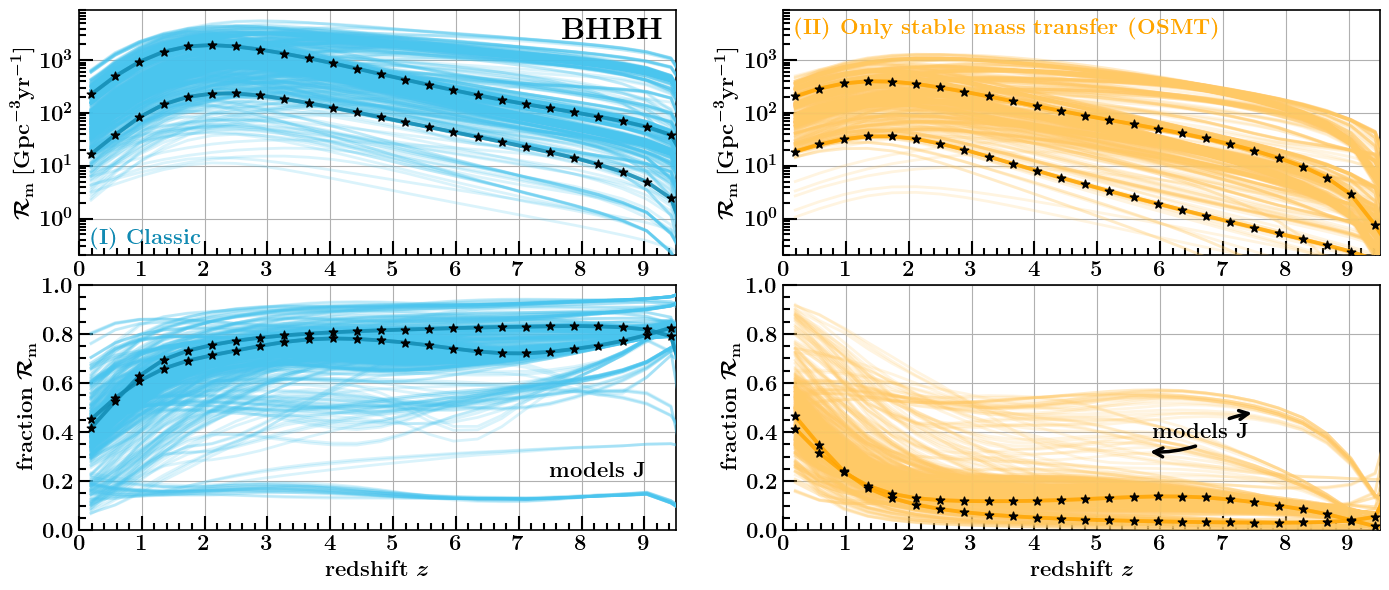

at DCOtype = BBH


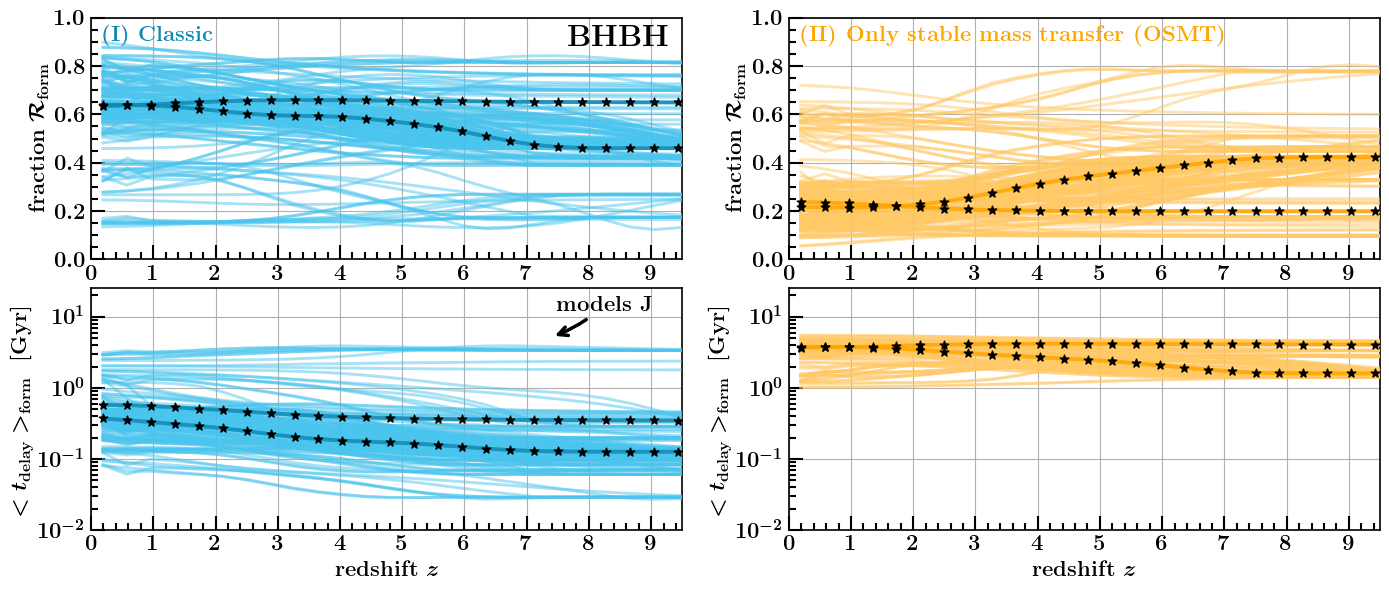

In [64]:
#### ASSUMPTIONS ######
############################
DCOtype = 'BBH'
# weights_type = 'formation' # merger
minimum_contribution_fc_threshold = 0.0#5#5
highlight_specif_models = ["A"] # # ["A", "J"] #[ "J"] # False
highlight_on=False
pathData='/Volumes/SimonsFoundation/DataDCO/' # path to datafiles 
############################
quantile_values=[0.5]
plot_total_median = False #  True # False #True 
single_model= False #True # False#True #False # True #True #False # True # False # True # False # True #False
edited_BPSnameslist =  BPSnameslist #['A','B', 'C', 'D', "E", 'G',"H", 'H',   'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'] #BPSnameslist #['A','B', 'C', 'D', "E", "F", 'G', "H", "K"]#, 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']#   
# highlight_specif_models = [] #["J"] #K
xparam_wanted = 't_delay'
######

redshifts_runs = obtain_redshiftsruns(pathData = pathData) # obtain redshift points 

######################################################################################################################
######################################### all 3 panels  #########################################
######################################################################################################################

# ncols, nrows= 2,3
# f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(14,8))

# print('at DCOtype =', DCOtype) 
# for BPSmodelName in  BPSnameslist[:]:
#     if BPSmodelName in ["Z"]: print('skipping', BPSmodelName)  
#     else: 
# #         print('BPSmodelName', BPSmodelName)
#         for ax_ind, adjustedChannelList in enumerate([['classic'],['stable B no CEE']]):
#             weights_type = 'merger'
#             ax[0,ax_ind] = plot_redshift_rate_single_panel(axe=ax[0, ax_ind], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
#             minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
#                                                    provide_adjustedChannelList=adjustedChannelList)

#             weights_type = 'formation' # merger
#             ax[1,ax_ind] = plot_redshift_rate_single_panel(axe=ax[1, ax_ind], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
#             minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
#                                                    provide_adjustedChannelList=adjustedChannelList)

#             weights_type = 'formation' # merger
#             ax[2,ax_ind] = plot_xparam_formation_channels_redshift_for_quantiles(axe=ax[2,ax_ind], DCOtype=DCOtype, BPS_models_to_run_list=[BPSmodelName], pathData=pathData,  single_model=single_model, quantile_values=quantile_values,\
#                         xparam=xparam_wanted, weights_type=weights_type,  plot_total_median=plot_total_median, highlight_specif_models=highlight_specif_models, provide_adjustedChannelList=adjustedChannelList)         
    
# #### make up axes ####
# for ax_ind, adjustedChannelList in enumerate([['classic'],['stable B no CEE']]):
#     plot_param_name, whichLayoutAxes = 'merger_fraction', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
#     make_up_axes_rates_plot(axe=ax[0,ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)   

#     plot_param_name, whichLayoutAxes = 'formation_fraction', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
#     make_up_axes_rates_plot(axe=ax[1,ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)  
    
#     plot_param_name, whichLayoutAxes = 't_delay_redshift', 'layoutAxes' # plot formation rate with no x-axes 
#     make_up_axes_rates_plot(axe=ax[2, ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)  


    
# # annotate with DCO type 
# ax[0,0].annotate(r'$\textbf{%s}$'%DCOname_dict[DCOtype], xy=(0.98, .97), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)             
# ax[0,1].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['stable B no CEE'], xy=(0.04, .98), xycoords='axes fraction', fontsize = fs-8, ha='left', va="top", zorder=100, color=channelColorDict['stable B no CEE'])
# ax[0,0].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['classic'], xy=(0.04, .98), xycoords='axes fraction', fontsize = fs-8, ha='left', va="top", zorder=100, color=channelColorDict['classic'])


# ##  SAVE FIG  ###
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.18, hspace=0.11)  
# plt.savefig('./fc_redshift_' + DCOtype  +'combined.png', transparent=True, dpi=600)
# plt.show()




######################################################################################################################
######################################### only BBH merger rates (top panels)  #########################################
######################################################################################################################


ncols, nrows= 2,2
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(14,6))
# f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(14,3))

print('at DCOtype =', DCOtype) 
for BPSmodelName in  BPSnameslist[:]:
    if BPSmodelName in ["Z"]: print('skipping', BPSmodelName)  
    else: 
#         print('BPSmodelName', BPSmodelName)
        for ax_ind, adjustedChannelList in enumerate([['classic'],['stable B no CEE']]):
        
        
            weights_type = 'merger'
            plot_redshift_rate_single_panel(axe=ax[0, ax_ind], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=False,plot_model_legend=False, plot_formation_channels=True,\
            minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                                   provide_adjustedChannelList=adjustedChannelList)   
        
            weights_type = 'merger'
            plot_redshift_rate_single_panel(axe=ax[1, ax_ind], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
            minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                                   provide_adjustedChannelList=adjustedChannelList)
 
##### make up axes ####
for ax_ind, adjustedChannelList in enumerate([['classic'],['stable B no CEE']]):
    plot_param_name, whichLayoutAxes = 'merger_rateBBH', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
    make_up_axes_rates_plot(axe=ax[0,ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)  

    plot_param_name, whichLayoutAxes = 'merger_fraction', 'layoutAxes' # plot formation rate with no x-axes 
    make_up_axes_rates_plot(axe=ax[1,ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)    


# annotate with DCO type 
# ax[0].annotate(r'$\textbf{%s}$'%DCOname_dict[DCOtype], xy=(0.98, .97), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)             
# ax[1].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['stable B no CEE'], xy=(0.04, .98), xycoords='axes fraction', fontsize = fs-8, ha='left', va="top", zorder=100, color=channelColorDict['stable B no CEE'])
# ax[0].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['classic'], xy=(0.04, .98), xycoords='axes fraction', fontsize = fs-8, ha='left', va="top", zorder=100, color=channelColorDict['classic'])
ax[0,0].annotate(r'$\textbf{%s}$'%DCOname_dict[DCOtype], xy=(0.98, .97), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)             
ax[0,1].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['stable B no CEE'], xy=(0.02, .97), xycoords='axes fraction', fontsize = fs-8, ha='left', va="top", zorder=100, color=channelColorDict['stable B no CEE'])
ax[0,0].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['classic'], xy=(0.02, .02), xycoords='axes fraction', fontsize = fs-8, ha='left', va="bottom", zorder=100, color=channelColorDict['classic'])
# ax[0,2].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['immediate CE'], xy=(0.04, .98), xycoords='axes fraction', fontsize = fs-12, ha='left', va="top", zorder=100, color=channelColorDict['immediate CE'])



# properties arrow 
strr = r"\textbf{models J}"
ax[1,0].annotate(strr, xy=(0.78, 0.8), xycoords='axes fraction', xytext=(0.95, 0.24), textcoords='axes fraction', size=16, va="center", ha="right")
ax[1,1].annotate(strr, xy=(0.79, 0.48), xycoords='axes fraction', xytext=(0.78, 0.4), textcoords='axes fraction', size=16, va="center", ha="right", \
                 arrowprops=dict(arrowstyle="->", connectionstyle=conn, fc="k",  lw=2.5), zorder=20000)
ax[1,1].annotate(" ", xy=(0.61, 0.32), xycoords='axes fraction', xytext=(0.7, 0.35), textcoords='axes fraction', size=16, va="center", ha="right", \
                 arrowprops=dict(arrowstyle="->", connectionstyle=conn, fc="k",  lw=2.5), zorder=20000)

##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.18, hspace=0.12)  
plt.savefig('./fc_redshift_' + DCOtype  +'merger.png', transparent=True, dpi=600)
plt.show()

######################################################################################################################
################################### only formation rates (bottom two row panels) ######################################   
######################################################################################################################


redshifts_runs = obtain_redshiftsruns(pathData = pathData) # obtain redshift points 

ncols, nrows= 2,2
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(14,6))

print('at DCOtype =', DCOtype) 
for BPSmodelName in  BPSnameslist[:]:
    if BPSmodelName in ["Z"]: print('skipping', BPSmodelName)  
    else: 
#         print('BPSmodelName', BPSmodelName)
        for ax_ind, adjustedChannelList in enumerate([['classic'],['stable B no CEE']]):

            weights_type = 'formation' # merger
            ax[0,ax_ind] = plot_redshift_rate_single_panel(axe=ax[0, ax_ind], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
            minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                                   provide_adjustedChannelList=adjustedChannelList)

            weights_type = 'formation' # merger
            ax[1,ax_ind] = plot_xparam_formation_channels_redshift_for_quantiles(axe=ax[1,ax_ind], DCOtype=DCOtype, BPS_models_to_run_list=[BPSmodelName], pathData=pathData,  single_model=single_model, quantile_values=quantile_values,\
                        xparam=xparam_wanted, weights_type=weights_type,  plot_total_median=plot_total_median, highlight_specif_models=highlight_specif_models, provide_adjustedChannelList=adjustedChannelList)         
    
#### make up axes ####
for ax_ind, adjustedChannelList in enumerate([['classic'],['stable B no CEE']]):
#     plot_param_name, whichLayoutAxes = 'merger_fraction', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
#     make_up_axes_rates_plot(axe=ax[0,ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)   

    plot_param_name, whichLayoutAxes = 'formation_fraction', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
    make_up_axes_rates_plot(axe=ax[0,ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)  
    
    plot_param_name, whichLayoutAxes = 't_delay_redshift', 'layoutAxes' # plot formation rate with no x-axes 
    make_up_axes_rates_plot(axe=ax[1, ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)  


# annotate with DCO type 
ax[0,0].annotate(r'$\textbf{%s}$'%DCOname_dict[DCOtype], xy=(0.98, .97), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)             
ax[0,1].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['stable B no CEE'], xy=(0.02, .97), xycoords='axes fraction', fontsize = fs-8, ha='left', va="top", zorder=100, color=channelColorDict['stable B no CEE'])
ax[0,0].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['classic'], xy=(0.02, .97), xycoords='axes fraction', fontsize = fs-8, ha='left', va="top", zorder=100, color=channelColorDict['classic'])



# properties arrow 
strr = r"\textbf{models J}"
x_xy, y_xy = 0.78, 0.8
x_xytext, y_xytext = 0.95, 0.93
conn = "arc3,rad=-0.1"
# draw arrow 
ax[1,0].annotate(strr,
  xy=(x_xy, y_xy), xycoords='axes fraction',
  xytext=(x_xytext, y_xytext), textcoords='axes fraction',
  size=16, va="center", ha="right",
  arrowprops=dict(arrowstyle="->",
                  connectionstyle=conn,
                  fc="k", lw=2.5), zorder=20000)


##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.18, hspace=0.12)  
plt.savefig('./fc_redshift_' + DCOtype  +'formation.png', transparent=True, dpi=600)
plt.show()



## BNS 

at DCOtype = BHNS


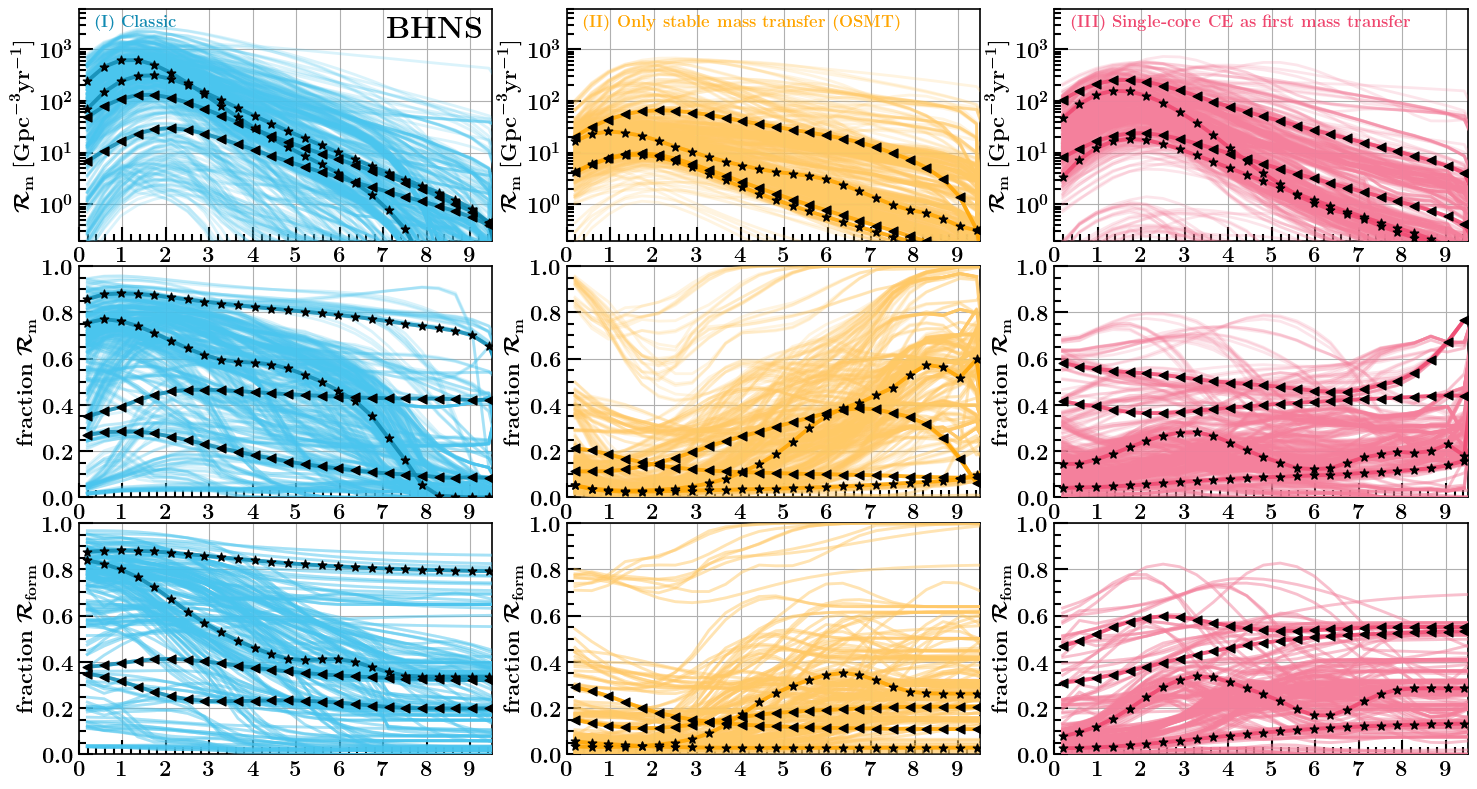

In [5]:
#### ASSUMPTIONS ######
############################
DCOtype = 'BHNS'
# weights_type = 'formation' # merger
minimum_contribution_fc_threshold = 0.0#5#5
highlight_specif_models = ["A", "J"] #[ "J"] # False
highlight_on=False
pathData='/Volumes/SimonsFoundation/DataDCO/' # path to datafiles 
############################
quantile_values=[0.5]
plot_total_median = False #  True # False #True 
single_model= False #True # False#True #False # True #True #False # True # False # True # False # True #False
edited_BPSnameslist =  BPSnameslist #['A','B', 'C', 'D', "E", 'G',"H", 'H',   'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'] #BPSnameslist #['A','B', 'C', 'D', "E", "F", 'G', "H", "K"]#, 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']#   
# highlight_specif_models = [] #["J"] #K
xparam_wanted = 't_delay'
######

redshifts_runs = obtain_redshiftsruns(pathData = pathData) # obtain redshift points 

######################################################################################################################
######################################### all 3 panels  #########################################
######################################################################################################################

ncols, nrows= 3,3
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(15,8))

print('at DCOtype =', DCOtype) 
for BPSmodelName in  BPSnameslist[:]:
    if BPSmodelName in ["Z"]: print('skipping', BPSmodelName)  
    else: 
#         print('BPSmodelName', BPSmodelName)
        for ax_ind, adjustedChannelList in enumerate([['classic'],['stable B no CEE'], ['immediate CE']]):


            weights_type = 'merger'
            plot_redshift_rate_single_panel(axe=ax[0, ax_ind], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=False,plot_model_legend=False, plot_formation_channels=True,\
            minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                                   provide_adjustedChannelList=adjustedChannelList)    
        
            weights_type = 'merger'
            ax[1,ax_ind] = plot_redshift_rate_single_panel(axe=ax[1, ax_ind], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
            minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                                   provide_adjustedChannelList=adjustedChannelList)

            weights_type = 'formation' # merger
            ax[2,ax_ind] = plot_redshift_rate_single_panel(axe=ax[2, ax_ind], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
            minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                                   provide_adjustedChannelList=adjustedChannelList)

#### make up axes ####
for ax_ind, adjustedChannelList in enumerate([['classic'],['stable B no CEE'], ['immediate CE']]):

    plot_param_name, whichLayoutAxes = 'merger_rateBHNS', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
    make_up_axes_rates_plot(axe=ax[0,ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)  

    plot_param_name, whichLayoutAxes = 'merger_fraction', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
    make_up_axes_rates_plot(axe=ax[1,ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)   

    plot_param_name, whichLayoutAxes = 'formation_fraction', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
    make_up_axes_rates_plot(axe=ax[2,ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)  
    
#     plot_param_name, whichLayoutAxes = 't_delay_redshift', 'layoutAxes' # plot formation rate with no x-axes 
# #     make_up_axes_rates_plot(axe=ax[2, ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)  


    
# annotate with DCO type 
ax[0,0].annotate(r'$\textbf{%s}$'%DCOname_dict[DCOtype], xy=(0.98, .97), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)             
ax[0,0].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['classic'], xy=(0.04, .98), xycoords='axes fraction', fontsize = fs-12, ha='left', va="top", zorder=100, color=channelColorDict['classic'])
ax[0,1].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['stable B no CEE'], xy=(0.04, .98), xycoords='axes fraction', fontsize = fs-12, ha='left', va="top", zorder=100, color=channelColorDict['stable B no CEE'])
ax[0,2].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['immediate CE'], xy=(0.04, .98), xycoords='axes fraction', fontsize = fs-12, ha='left', va="top", zorder=100, color=channelColorDict['immediate CE'])


##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.18, hspace=0.11)  
plt.savefig('./fc_redshift_' + DCOtype  +'combined.png', transparent=True, dpi=600)
plt.show()






at DCOtype = BNS


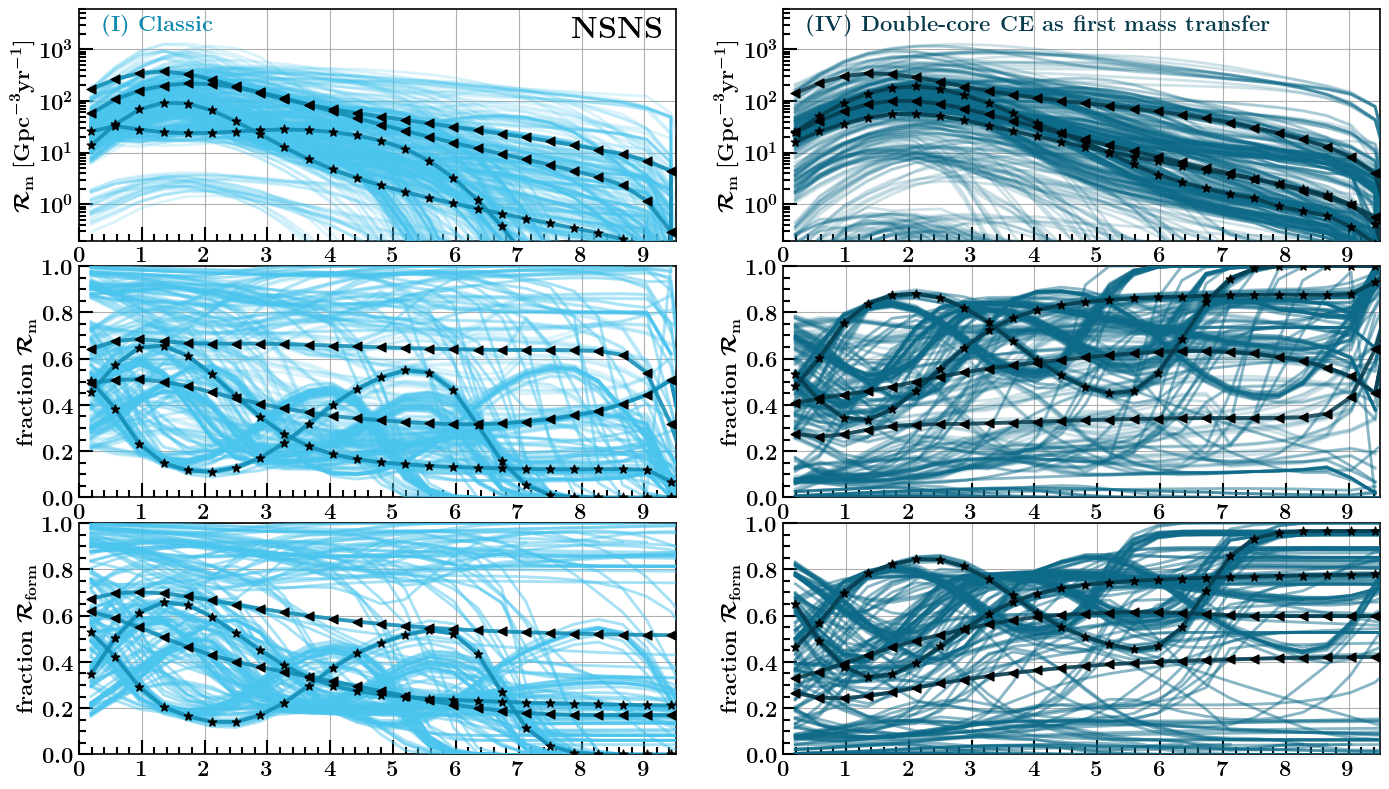

In [6]:
#### ASSUMPTIONS ######
############################
DCOtype = 'BNS'
# weights_type = 'formation' # merger
minimum_contribution_fc_threshold = 0.0#5#5
highlight_specif_models = ["A", "J"] #[ "J"] # False
highlight_on=False
pathData='/Volumes/SimonsFoundation/DataDCO/' # path to datafiles 
############################
quantile_values=[0.5]
plot_total_median = False #  True # False #True 
single_model= False #True # False#True #False # True #True #False # True # False # True # False # True #False
edited_BPSnameslist =  BPSnameslist #['A','B', 'C', 'D', "E", 'G',"H", 'H',   'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T'] #BPSnameslist #['A','B', 'C', 'D', "E", "F", 'G', "H", "K"]#, 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']#   
# highlight_specif_models = [] #["J"] #K
xparam_wanted = 't_delay'
######

redshifts_runs = obtain_redshiftsruns(pathData = pathData) # obtain redshift points 

######################################################################################################################
######################################### all 3 panels  #########################################
######################################################################################################################

ncols, nrows= 2,3
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(14,8))

print('at DCOtype =', DCOtype) 
for BPSmodelName in  BPSnameslist[:]:
    if BPSmodelName in ["Z"]: print('skipping', BPSmodelName)  
    else: 
#         print('BPSmodelName', BPSmodelName)
        for ax_ind, adjustedChannelList in enumerate([['classic'],['double-core CE']]):
            weights_type = 'merger'
            plot_redshift_rate_single_panel(axe=ax[0, ax_ind], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=False,plot_model_legend=False, plot_formation_channels=True,\
            minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                                   provide_adjustedChannelList=adjustedChannelList)    
        
            weights_type = 'merger'
            ax[1,ax_ind] = plot_redshift_rate_single_panel(axe=ax[1, ax_ind], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
            minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                                   provide_adjustedChannelList=adjustedChannelList)

            weights_type = 'formation' # merger
            ax[2,ax_ind] = plot_redshift_rate_single_panel(axe=ax[2, ax_ind], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
            minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                                   provide_adjustedChannelList=adjustedChannelList)
#### make up axes ####
for ax_ind, adjustedChannelList in enumerate([['classic'],['double-core CE']]):
    plot_param_name, whichLayoutAxes = 'merger_rateBHNS', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
    make_up_axes_rates_plot(axe=ax[0,ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)  

    plot_param_name, whichLayoutAxes = 'merger_fraction', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
    make_up_axes_rates_plot(axe=ax[1,ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)   

    plot_param_name, whichLayoutAxes = 'formation_fraction', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
    make_up_axes_rates_plot(axe=ax[2,ax_ind], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes, fontsize=16)  


    
# annotate with DCO type 
ax[0,0].annotate(r'$\textbf{%s}$'%DCOname_dict[DCOtype], xy=(0.98, .97), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)             
ax[0,1].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['double-core CE'], xy=(0.04, .98), xycoords='axes fraction', fontsize = fs-8, ha='left', va="top", zorder=100, color=channelColorDict['double-core CE'])
ax[0,0].annotate(r'$\textbf{%s}$'%dictChannelsBHNSListBolt['classic'], xy=(0.04, .98), xycoords='axes fraction', fontsize = fs-8, ha='left', va="top", zorder=100, color=channelColorDict['classic'])


##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.18, hspace=0.11)  
plt.savefig('./fc_redshift_' + DCOtype  +'combined.png', transparent=True, dpi=600)
plt.show()


In [7]:
## 

In [8]:
def plot_redshift_uncertainty_single_panel(axe='None', whichplot='rate', DCOtype='BHNS', \
                                          BPSmodelName='A', weights_type='merger', redshifts=[0], pathData='/Volumes/SimonsFoundation/DataDCO/',\
                                    singlemssfr=False, plot_fraction=False, plot_model_legend=True, plot_formation_channels=True,\
                                   minimum_contribution_fc_threshold=False, highlight_on=True, provide_adjustedChannelList=False, highlight_specif_models=False):
    """
    whichplot='rate', 'ratio'
    
    """

    if provide_adjustedChannelList==False: adjustedChannelList = [ 'immediate CE',  r'double-core CE', 'other', 'classic', 'stable B no CEE'] # 'vii', 
    else: adjustedChannelList = provide_adjustedChannelList
    
    DCOname = DCOname_dict[DCOtype]
    pd_file_path = obtain_path(DCOtype, BPSmodelName, weights_type)
    df = pd.read_csv(pd_file_path)
    
    if singlemssfr==False: MSSFRs = MSSFRnameslist
    else: 
        MSSFRs = [singlemssfr] 
        print('check if this actually works with the next line')
    

    
    for ind_mssfr, mssfr in enumerate(MSSFRs[1:]): 
        
        key_total_mssfr = 'total_rate_' + 'xyz_' + mssfr
        totals_z =  df[key_total_mssfr]

        # assign line/marker properties. if we want to highlight the model, assign different marker properties
        highlight_specific_model = False
        alpha_m, z_order, lw_m = 0.2, 9, 2
        if (BPSmodelName in highlight_specif_models) & (mssfr in ['111', '313']): 
            highlight_specific_model = True
            alpha_m, z_order, lw_m = 0.6, 10, 2.7

            
        # plot the formation channel fractions 
        for nrC, Channel in enumerate(adjustedChannelList): 

            if highlight_specific_model==True: c_FC = channelColorDict[Channel]
            else: c_FC = channelColorDict_lighter[Channel]

            fparam_key_fc, key_fc_mssfr, fractions_z, header_fc = "formationchannel_z_rates", Channel + 'xyz_' + mssfr, np.zeros_like(redshifts),  "fraction_" + Channel + "_" + mssfr 
            fc_rates_z =  df[key_fc_mssfr]   

            if plot_fraction==True: fc_z =  fc_rates_z / totals_z  # plot fraction instead of totals 
            else: fc_z = fc_rates_z    # plot totals 
            
            # mask minimum contributions below threshold
            if minimum_contribution_fc_threshold!=False:
                mask_does_not_pass_fc_threshold = ((fc_rates_z / totals_z)< minimum_contribution_fc_threshold) 
                fc_z[mask_does_not_pass_fc_threshold] = np.nan      


            axe.plot(redshifts, fc_z, color=c_FC, lw=lw_m, zorder=z_order, alpha=alpha_m)

            if highlight_specific_model==True:                    
                marker_shape_bps = dictMarkerShape[BPSmodelName]
                axe.scatter(redshifts, fc_z, color='k', zorder=z_order+2, marker=marker_shape_bps, s=40) #, label=bps_model_to_highlight)  
                axe.plot(redshifts, fc_z, color=c_FC, lw=lw_m, zorder=z_order+1, alpha=alpha_m)



#     if plot_model_legend==True:
#         bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.95)
#         axe.annotate(r'\textbf{model %s: }'%(BPSmodelName) + alphabetPhysicalNameDict[BPSmodelName], xy=(0.985, .95),\
#                      xycoords='axes fraction', fontsize = fs-3, weight = 'bold', ha='right', va="top",bbox=bbox_props,\
#                     zorder=1E10)    
        
    return axe




In [9]:
# !ls ../Figure_Redshift_Rates/

### Use this code later 


at DCOtype = BBH
BPSmodelName A


TypeError: argument of type 'bool' is not iterable

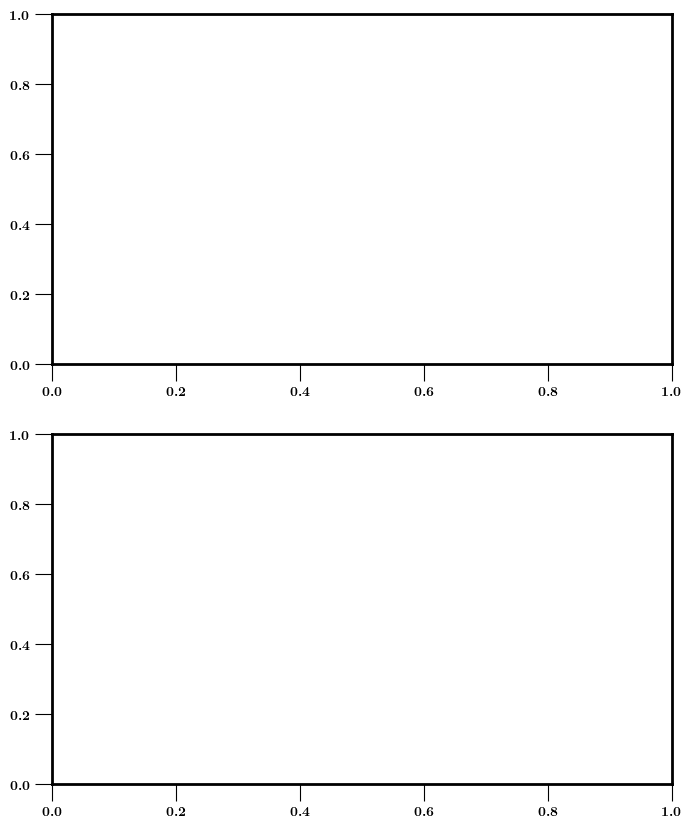

In [10]:

############################
DCOtype = 'BBH'
# weights_type = 'formation' # merger
minimum_contribution_fc_threshold = 0.0#5#5
highlight_specif_models = False #[ "J"] # False
highlight_on=False
pathData='/Volumes/SimonsFoundation/DataDCO/' # path to datafiles 
adjustedChannelList = ['classic', 'stable B no CEE']
############################

redshifts_runs = obtain_redshiftsruns(pathData = pathData) # obtain redshift points 

ncols, nrows= 1,2
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,10))

print()
print('at DCOtype =', DCOtype)
for BPSmodelName in  BPSnameslist[:]:
    if BPSmodelName in ["Z"]: print('skipping', BPSmodelName)  

    else: 
        weights_type='merger'
        print('BPSmodelName', BPSmodelName)
        ax[0] = plot_redshift_rate_single_panel(axe=ax[0], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
        minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                               provide_adjustedChannelList=adjustedChannelList)
        
        weights_type = 'formation' # merger
        ax[1] = plot_redshift_rate_single_panel(axe=ax[1], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
        minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                               provide_adjustedChannelList=adjustedChannelList)

#### make up axes ####
plot_param_name, whichLayoutAxes = 'merger_fraction', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
make_up_axes_rates_plot(axe=ax[0], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes)           
plot_param_name, whichLayoutAxes = 'formation_fraction', 'layoutAxes' # plot formation rate with no x-axes 
make_up_axes_rates_plot(axe=ax[1], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes)  

# annotate with DCO type 
ax[0].annotate(r'$\textbf{%s}$'%DCOname_dict[DCOtype], xy=(0.98, .97), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)             

##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.11)  
plt.savefig('./fraction_fraction_' + DCOtype  +'.png', transparent=True, dpi=600)
plt.show()

################################################################################################
################################################################################################
############################################################################################################################
DCOtype = 'BBH'
# weights_type = 'formation' # merger
minimum_contribution_fc_threshold = 0.0#5#5
highlight_specif_models = False #[ "J"] # False
highlight_on=False
pathData='/Volumes/SimonsFoundation/DataDCO/' # path to datafiles 
adjustedChannelList = ['classic', 'stable B no CEE']
############################

redshifts_runs = obtain_redshiftsruns(pathData = pathData) # obtain redshift points 

ncols, nrows= 2,1
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(14,6))

print()
print('at DCOtype =', DCOtype)
for BPSmodelName in  BPSnameslist[:]:
    if BPSmodelName in ["Z"]: print('skipping', BPSmodelName)  

    else: 
        weights_type='merger'
        print('BPSmodelName', BPSmodelName)
        ax[0] = plot_redshift_rate_single_panel(axe=ax[0], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
        minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                               provide_adjustedChannelList=adjustedChannelList)
        
        weights_type = 'formation' # merger
        ax[1] = plot_redshift_rate_single_panel(axe=ax[1], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
        minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                               provide_adjustedChannelList=adjustedChannelList)

#### make up axes ####
plot_param_name, whichLayoutAxes = 'merger_fraction', 'layoutAxes' # plot formation rate with no x-axes 
make_up_axes_rates_plot(axe=ax[0], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes)           
plot_param_name, whichLayoutAxes = 'formation_fraction', 'layoutAxes' # plot formation rate with no x-axes 
make_up_axes_rates_plot(axe=ax[1], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes)  

# annotate with DCO type 
ax[0].annotate(r'$\textbf{%s}$'%DCOname_dict[DCOtype], xy=(0.98, .97), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)             

##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=0.)  
plt.savefig('./fc_redshift_' + DCOtype  +'_combined.png', transparent=True, dpi=600)
plt.show()


In [ ]:

############################
DCOtype = 'BBH'
# weights_type = 'formation' # merger
minimum_contribution_fc_threshold = 0.0#5#5
highlight_specif_models = False #[ "J"] # False
highlight_on=False
pathData='/Volumes/SimonsFoundation/DataDCO/' # path to datafiles 
adjustedChannelList = ['classic']
############################

redshifts_runs = obtain_redshiftsruns(pathData = pathData) # obtain redshift points 

ncols, nrows= 1,2
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,10))

print()
print('at DCOtype =', DCOtype)
for BPSmodelName in  BPSnameslist[:]:
    if BPSmodelName in ["Z"]: print('skipping', BPSmodelName)  

    else: 
        weights_type='merger'
        print('BPSmodelName', BPSmodelName)
        ax[0] = plot_redshift_rate_single_panel(axe=ax[0], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
        minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                               provide_adjustedChannelList=adjustedChannelList)
        
        weights_type = 'formation' # merger
        ax[1] = plot_redshift_rate_single_panel(axe=ax[1], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
        minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
                                               provide_adjustedChannelList=adjustedChannelList)

#### make up axes ####
plot_param_name, whichLayoutAxes = 'merger_fraction', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
make_up_axes_rates_plot(axe=ax[0], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes)           
plot_param_name, whichLayoutAxes = 'formation_fraction', 'layoutAxes' # plot formation rate with no x-axes 
make_up_axes_rates_plot(axe=ax[1], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes)  

# annotate with DCO type 
ax[0].annotate(r'$\textbf{%s}$'%DCOname_dict[DCOtype], xy=(0.98, .97), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)             

##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.11)  
plt.savefig('./fraction_fraction_' + DCOtype  +'.png', transparent=True, dpi=600)
plt.show()

################################################################################################
################################################################################################
# ############################################################################################################################
# DCOtype = 'BBH'
# # weights_type = 'formation' # merger
# minimum_contribution_fc_threshold = 0.0#5#5
# highlight_specif_models = False #[ "J"] # False
# highlight_on=False
# pathData='/Volumes/SimonsFoundation/DataDCO/' # path to datafiles 
# adjustedChannelList = ['classic']
# ############################

# redshifts_runs = obtain_redshiftsruns(pathData = pathData) # obtain redshift points 

# ncols, nrows= 2,1
# f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(14,6))

# print()
# print('at DCOtype =', DCOtype)
# for BPSmodelName in  BPSnameslist[:]:
#     if BPSmodelName in ["Z"]: print('skipping', BPSmodelName)  

#     else: 
#         weights_type='merger'
#         print('BPSmodelName', BPSmodelName)
#         ax[0] = plot_redshift_rate_single_panel(axe=ax[0], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
#         minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
#                                                provide_adjustedChannelList=adjustedChannelList)
        
#         weights_type = 'formation' # merger
#         ax[1] = plot_redshift_rate_single_panel(axe=ax[1], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
#         minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models,\
#                                                provide_adjustedChannelList=adjustedChannelList)

# #### make up axes ####
# plot_param_name, whichLayoutAxes = 'merger_fraction', 'layoutAxes' # plot formation rate with no x-axes 
# make_up_axes_rates_plot(axe=ax[0], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes)           
# plot_param_name, whichLayoutAxes = 'formation_fraction', 'layoutAxes' # plot formation rate with no x-axes 
# make_up_axes_rates_plot(axe=ax[1], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes)  

# # annotate with DCO type 
# ax[0].annotate(r'$\textbf{%s}$'%DCOname_dict[DCOtype], xy=(0.98, .97), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)             

# ##  SAVE FIG  ###
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.15, hspace=0.)  
# plt.savefig('./fraction_fraction_' + DCOtype  +'_horizontal.png', transparent=True, dpi=600)
# plt.show()


In [ ]:

############################
DCOtype = 'BBH'
weights_type = 'formation' # merger
minimum_contribution_fc_threshold = 0.0#5#5
highlight_specif_models = False #[ "J"] # False
highlight_on=False
pathData='/Volumes/SimonsFoundation/DataDCO/' # path to datafiles 
############################

redshifts_runs = obtain_redshiftsruns(pathData = pathData) # obtain redshift points 

ncols, nrows= 1,2
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,10))

print()
print('at DCOtype =', DCOtype)
for BPSmodelName in  BPSnameslist[:]:
    if BPSmodelName in ["Z"]: print('skipping', BPSmodelName)  

    else: 
        print('BPSmodelName', BPSmodelName)
        ax[0] = plot_redshift_rate_single_panel(axe=ax[0], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=False,plot_model_legend=False,\
        plot_formation_channels=True, minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on,highlight_specif_models=highlight_specif_models)

        ax[1] = plot_redshift_rate_single_panel(axe=ax[1], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
        minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models)

#### make up axes ####
plot_param_name, whichLayoutAxes = 'formation_rate', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
make_up_axes_rates_plot(axe=ax[0], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes)           
plot_param_name, whichLayoutAxes = 'formation_fraction', 'layoutAxes' # plot formation rate with no x-axes 
make_up_axes_rates_plot(axe=ax[1], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes)  

# annotate with DCO type 
ax[0].annotate(r'$\textbf{%s}$'%DCOname_dict[DCOtype], xy=(0.98, .97), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)             

##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0., hspace=0.11)  
plt.savefig('./rates_and_fraction_' + DCOtype  + '_' + weights_type +'.png', transparent=True, dpi=600)
plt.show()


In [ ]:
for weights_type in ['formation', 'merger']:
    for DCOtype in ['BHNS', 'BNS', 'BBH']:
        ############################
        minimum_contribution_fc_threshold = 0.0#5#5
        highlight_specif_models = False #[ "J"] # False
        highlight_on=False
        pathData='/Volumes/SimonsFoundation/DataDCO/' # path to datafiles 
        ############################

        redshifts_runs = obtain_redshiftsruns(pathData = pathData) # obtain redshift points 

        ncols, nrows= 1,2
        f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(8,10))

        print()
        print('at DCOtype =', DCOtype)
        for BPSmodelName in  BPSnameslist[:]:
            if BPSmodelName in ["Z"]: print('skipping', BPSmodelName)  

            else: 
                print('BPSmodelName', BPSmodelName)
                ax[0] = plot_redshift_rate_single_panel(axe=ax[0], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=False,plot_model_legend=False,\
                plot_formation_channels=True, minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on,highlight_specif_models=highlight_specif_models)

                ax[1] = plot_redshift_rate_single_panel(axe=ax[1], DCOtype=DCOtype,weights_type=weights_type,redshifts=redshifts_runs,BPSmodelName=BPSmodelName,pathData=pathData,plot_fraction=True,plot_model_legend=False, plot_formation_channels=True,\
                minimum_contribution_fc_threshold=minimum_contribution_fc_threshold, highlight_on=highlight_on, highlight_specif_models=highlight_specif_models)

        #### make up axes ####
        plot_param_name, whichLayoutAxes = 'formation_rate', 'layoutAxesNoXlabel' # plot formation rate with no x-axes 
        make_up_axes_rates_plot(axe=ax[0], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes)           
        plot_param_name, whichLayoutAxes = 'formation_fraction', 'layoutAxes' # plot formation rate with no x-axes 
        make_up_axes_rates_plot(axe=ax[1], plot_param_name=plot_param_name, whichLayoutAxes=whichLayoutAxes)  

        # annotate with DCO type 
        ax[0].annotate(r'$\textbf{%s}$'%DCOname_dict[DCOtype], xy=(0.98, .97), xycoords='axes fraction', fontsize = fs-2, weight = 'bold', ha='right', va="top", zorder=100)             

        ##  SAVE FIG  ###
        plt.tight_layout()
        plt.subplots_adjust(wspace=0., hspace=0.11)  
        plt.savefig('./rates_and_fraction_' + DCOtype  + '_' + weights_type +'.png', transparent=True, dpi=600)
        plt.show()
